In [101]:
import numpy as np
import random
import matplotlib.pyplot as plt

from helpers.qec_helpers import *
from helpers.gates import *
from helpers.steane_helpers import *
from helpers.errors import *
from helpers.fault_tolerance import *



# Modelling and simulating noisy quantum computers

## Depolarizing Channel:
### Simulates bit and phase flips due to gate infidelities with in the circuit (probability $p_1$)
$$ K_{D_0} = \sqrt{1-p_1}, \quad K_{D_1} = \sqrt{\frac{p_1}{3}}X, \quad K_{D_2} = \sqrt{\frac{p_1}{3}}Z, \quad K_{D_3} = \sqrt{\frac{p_1}{3}}Y$$
$$ \rho \mapsto D(\rho) = \sum_{i = 0}^{3}K_{D_i}\rho K^\dagger_{D_i}$$


<u>Single qubit gate model:</u> error after single qubit gate according to single qubit error rates

This example will show a hadamard gate but all other single qubit gate operations will work similarly.

In [314]:
psi = np.array([1, 0]) # initial state
gate = sigma_x # single qubit gate we want to implement

psi_prime = np.dot(gate, psi) # state after perfect gate operation
print('State after perfect gate operation: \n', psi_prime)
print_state_info(psi_prime, 2)
print('- - - - - - - - - - ')
# dens.reshape(2,2)
rho = np.kron(psi_prime, psi_prime.conj().T)
print('State after perfect gate operation: \n', rho.reshape(2,2))
# print_state_info(dens, 2)

p_1 = 0.001 # error probability of the hadamrd gate operation
KD0 = np.sqrt(1-p_1) * sigma_I
KD1 = np.sqrt(p_1/3) * sigma_x
KD2 = np.sqrt(p_1/3) * sigma_z
KD3 = np.sqrt(p_1/3) * sigma_y

# apply the error operators on the density matrix after we have applied our 'perfect gate'
D_rho = np.dot(KD0, np.dot(rho.reshape(2,2), KD0.conj().T)) + np.dot(KD1, np.dot(rho.reshape(2,2), KD1.conj().T)) + np.dot(
    KD2, np.dot(rho.reshape(2,2), KD2.conj().T)) + np.dot(KD3, np.dot(rho.reshape(2,2), KD3.conj().T))

print('State after errored gate operation: \n', D_rho)
# print_state_info(D_rho.reshape(4, 1), 2)
# print_state_info(D_rho, 1)

State after perfect gate operation: 
 [0 1]
1 :  1
- - - - - - - - - - 
State after perfect gate operation: 
 [[0 0]
 [0 1]]
State after errored gate operation: 
 [[6.66666667e-04+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 9.99333333e-01+0.j]]


In [315]:
# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(D_rho)):
    prob_sum += np.abs(D_rho[i,i])
    state_probs = np.append(state_probs, D_rho[i,i])
    
print(state_probs[0], state_probs[1])

print('total probabilities: ', prob_sum)


(0.0006666666666666666+0j) (0.9993333333333334+0j)
total probabilities:  1.0


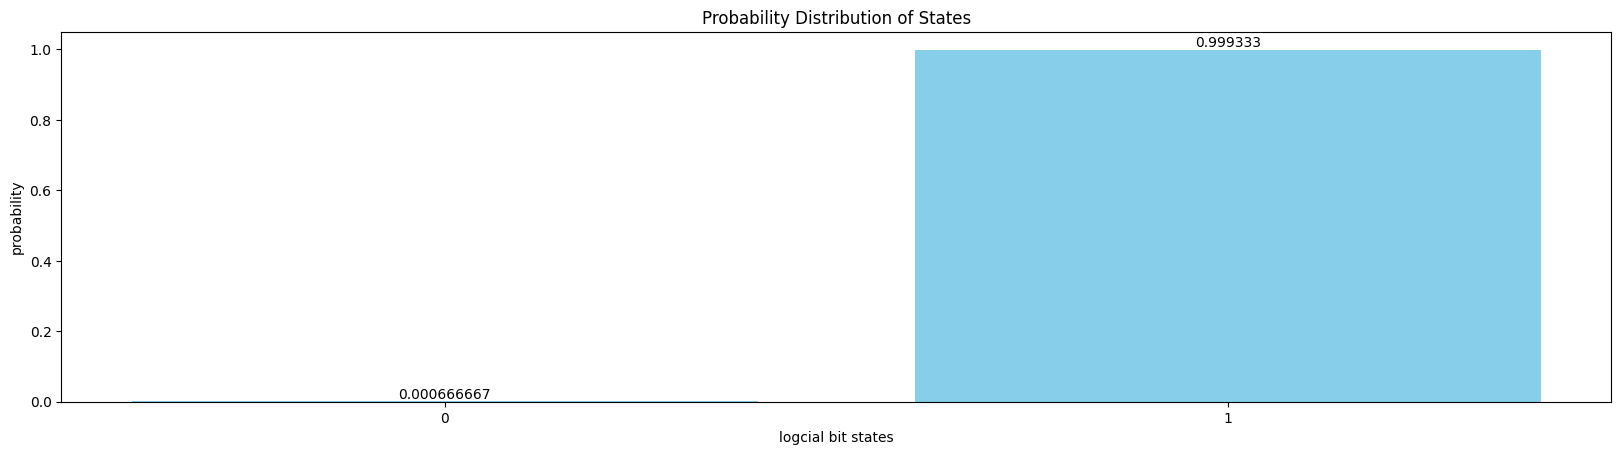

In [316]:
bits = vector_state_to_bit_state(state_probs, 1)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs, label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

<u> Two qubit gate model:</u> Error occurs after a two qubit gate according to two qubit error rates


This example will use a CNOT matrix between 2 qubits in a 3 qubit system. We will first show all-to-all connectivity and then restrict to line to line (after that grid will work similarly to both of these)

In [318]:
zero = np.array([1, 0])
one = np.array([0, 1])
psi = np.kron(one, np.kron(zero, one)) # set an initial_state
cnot_gate = CNOT(0, 1, 3) # CNOT gate with q0 as control and q1 as target

psi_prime = np.dot(cnot_gate, psi) # apply a cnot gate

rho = np.kron(psi_prime, psi_prime.conj().T) # convert to the density matrix to apply error gates

rho_prime = np.dot(cnot_gate, rho) # apply perfect CNOT gate

# qubit 0 error rates:
p_1_q0 = 0.00001 # error probability of a gate operation
KD0_q0 = np.sqrt(1-p_1_q0) * sigma_I
KD1_q0 = np.sqrt(p_1_q0/3) * sigma_x
KD2_q0 = np.sqrt(p_1_q0/3) * sigma_z
KD3_q0 = np.sqrt(p_1_q0/3) * sigma_y

KD0_q0 = np.kron(KD0_q0, np.identity(2**2)) 
KD1_q0 = np.kron(KD1_q0, np.identity(2**2)) 
KD2_q0 = np.kron(KD2_q0, np.identity(2**2)) 
KD3_q0 = np.kron(KD3_q0, np.identity(2**2)) 

# qubit 1 error rates:
p_1_q1 = 0.00001 # error probability of a gate operation
KD0_q1 = np.sqrt(1-p_1_q1) * sigma_I
KD1_q1 = np.sqrt(p_1_q1/3) * sigma_x
KD2_q1 = np.sqrt(p_1_q1/3) * sigma_z
KD3_q1 = np.sqrt(p_1_q1/3) * sigma_y

KD0_q0 = np.kron(KD0_q0, np.identity(2**2)) 
KD1_q0 = np.kron(KD1_q0, np.identity(2**2)) 
KD2_q0 = np.kron(KD2_q0, np.identity(2**2)) 
KD3_q0 = np.kron(KD3_q0, np.identity(2**2))

# qubit 2 error rates:
p_1_q2 = 0.00001 # error probability of a gate operation
KD0_q2 = np.sqrt(1-p_1_q2) * sigma_I
KD1_q2 = np.sqrt(p_1_q2/3) * sigma_x
KD2_q2 = np.sqrt(p_1_q2/3) * sigma_z
KD3_q2 = np.sqrt(p_1_q2/3) * sigma_y

KD0_q0 = np.kron(KD0_q0, np.identity(2**2)) 
KD1_q0 = np.kron(KD1_q0, np.identity(2**2)) 
KD2_q0 = np.kron(KD2_q0, np.identity(2**2)) 
KD3_q0 = np.kron(KD3_q0, np.identity(2**2))

# apply error gates (qubit 0 and qubibt 1 will not be affected by error gates, although we do apply Identity to q0)
D_rho_q1 = np.dot(KD0_q1, np.dot(rho_prime, KD0_q1.conj().T)) + np.dot(
    KD1_q1, np.dot(rho_prime, KD1_q1.conj().T)) + np.dot(
    KD2_q1, np.dot(rho_prime, KD2_q1.conj().T)) + np.dot(
    KD3_q1, np.dot(rho_prime, KD3_q1.conj().T))
final_rho = D_rho_q1
# D_rho_q0 = np.kron(D_rho_q0, np.identity(2**2))

# D_rho_q1 = np.dot(np.identity(2), np.dot(rho_prime, np.identity(2).conj().T)) + np.dot(
#     np.identity(2), np.dot(rho_prime, np.identity(2).conj().T)) + np.dot(
#     np.identity(2), np.dot(rho_prime, np.identity(2).conj().T)) + np.dot(
#     np.identity(2), np.dot(rho_prime, np.identity(2).conj().T))

# D_rho_q1 = np.kron(np.identity(2), np.kron(D_rho_q1, np.identity(2)))

# final_rho = np.dot(D_rho_q0, D_rho_q1)

print_state_info(final_rho.reshape(64, 1), 6)


ValueError: shapes (8,8) and (1,8) not aligned: 8 (dim 1) != 1 (dim 0)

In [87]:
print(final_rho)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


## State Preparation and Measuremnt:

## Thermal Decoherence and Dephasing Channel: